In [ ]:
#!pip install wordcloud
#!pip install spacy
#!pip install catboost


In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np
#import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
#from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#spacy.load('en', parse=True, tag=True, entity=True)


## Modeling
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import learning_curve
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
#from sklearn.pipeline import Pipeline
#from sklearn.naive_bayes import MultinomialNB
#from catboost import CatBoostClassifier, Pool
#rom sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
#from xgboost import XGBClassifier
#from sklearn.dummy import DummyClassifier

## Warnings
#import warnings
#from scipy import stats
#warnings.filterwarnings('ignore')

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [107]:
location = 'E:/Amazon/Videos/04-04-2021/Use Case 2/archive/'
df_All = pd.read_csv(location+'reviews.csv')


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [108]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)


In [109]:
df_All.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [110]:
df_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [111]:
df = df_All[['reviews.rating','reviews.text']]

In [112]:
#df.iloc[1:3, 0:2]
df.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [113]:
df.shape

(34660, 2)

In [114]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [115]:
df.isnull().sum()

reviews.rating    33
reviews.text       1
dtype: int64

In [116]:
df = df.dropna()

In [117]:
df.shape

(34626, 2)

In [118]:
df[df["reviews.rating"] == 1][:1]


,reviews.rating,reviews.text
126,1.0,i Bought this around black friday for $60 hopi...


In [119]:
df[df["reviews.rating"] == 1][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
126,1.000000,"i Bought this around black friday for $60 hoping it would be awesome... it failed so hard i tried multiple different micro SD cards none of which were recognized and YES i formated them with every format i could think of ... Fat32, NTFS, Fat, Xfat... i even tried to have the tablet do it... didnt work... to make matters worse half the apps i wanted to use werent in the app store and i came to find out that it isnt linked to the normal google play store this tablet has its own app store which is missing many common apps... the main reason i bought this was to play clash of clans and i cant because it wasnt on the app store... i tried to also use aftermarket play stores to play COC but it didnt work... launched and played 1 time but didnt work or update after that... needless to say i returned it and bought a $250 samsung galaxy tab A 10.1 (2016 version) with S-pen and its WAYYYYY better... bottom line you get what you pay for... also hint the s-pen version has an extra 1 GB of ram over the non pen version... so you should get that if you can afford the extra $50..."
169,1.000000,I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.


In [120]:
df[df["reviews.rating"] == 2][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
117,2.000000,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
281,2.000000,Not a good product short battery life i can only use for 20 minutes


In [121]:
df[df["reviews.rating"] == 3][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
222,3.000000,I was hoping to use Google launcher with this tablet but it is really locked down and you cannot change the launcher or the lock screen. Still cheap and fine for watching movies.
226,3.000000,"The tablet works fine. It is responsive with good resolution. It is too tied to Amazon. It requires too many hoops to get apps such as Zinio to work. Until Amazon loosens its grip, I recommend only at a very good price."


In [122]:
df[df["reviews.rating"] == 4][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
3,4.000000,I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.
6,4.000000,"Great for e-reading on the go, nice and light weight, and for the price point given, definitely worth the purchase."


In [123]:
df[df["reviews.rating"] == 5][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
0,5.000000,This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.
1,5.000000,great for beginner or experienced person. Bought as a gift and she loves it


Based on the examples that we have reviewed it seeems that reviews ratings 1,2,3 are negative while 4,5 are positive.

In [124]:
df['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [125]:
print ('positive ', len (df[df["reviews.rating"].isin([4,5])]))
print ('negative ', len (df[df["reviews.rating"].isin([1,2,3])]))


positive  32315
negative  2311


<br><b>
We will create a new column to reflect positive and negative <br>

In [126]:
# will remap the values
dict = {5 :1 ,4 : 1, 3 : 0, 2 : 0, 1 : 0}

# Print the dictionary
print(dict)



{5: 1, 4: 1, 3: 0, 2: 0, 1: 0}


In [127]:
# Remap the values of the dataframe
df = df.replace({"reviews.rating": dict})


In [128]:
df['reviews.rating'].value_counts()

1.0    32315
0.0     2311
Name: reviews.rating, dtype: int64

<b><h1>Observation<br> </b>

We observed that the data is imbalanced, to solve this problem we should consider the following:
    - To use Stratified Kfolds in our models
    - Try using SMOTE for both up and down sampling

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34626 non-null  float64
 1   reviews.text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [130]:
df.isnull().sum()

reviews.rating    0
reviews.text      0
dtype: int64

In [131]:
def confusion_mat(predictions, labels):
    """
    predictor : Predictor object of model
    features: Input features to model
    label: Ground truth target values
    """

    accuracy = (predictions == labels).sum() / labels.shape[0]
    print(f'Accuracy: {accuracy}')
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predictions, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')
    
    confusion_matrix = pd.crosstab(index=labels, columns=predictions, rownames=['Actual'], colnames=['Predicted']).astype(int)
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap="YlGnBu").set_title('Confusion Matrix')


In [170]:
df_cpy = df.copy()

In [171]:
#Randomly split the data into a test and train datasets 
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split (df["reviews.text"],                   
                                                 df['reviews.rating'],
                                                 test_size=0.25,                                                                   
                                                 random_state=0)


In [161]:
# Note: CountVectorizer performs lowercasing by default. 
vectorizer = CountVectorizer()


In [172]:
train_vectorized = vectorizer.fit_transform(train)
train_vectorized

<25969x12223 sparse matrix of type '<class 'numpy.int64'>'
	with 610311 stored elements in Compressed Sparse Row format>

In [163]:
print(vectorizer.get_feature_names())

['00', '000', '000s', '01', '04', '05', '06', '0ff', '0ghz', '0ne', '10', '100', '1000', '1000ma', '1000s', '1005', '100m', '100mbps', '100s', '100x', '1024', '105', '107', '108', '1080', '1080p', '10and', '10in', '10it', '10k', '10th', '10w', '10x', '10yr', '11', '110', '119', '11yr', '12', '120', '1200', '120v', '122', '125', '1275', '128', '1280', '128gb', '129', '1292', '1299', '12gb', '12mpb', '12yr', '13', '130', '139', '13th', '13yrs', '14', '140', '1400', '149', '14yr', '15', '150', '1500', '15mbps', '15min', '15mins', '15yr', '15yrs', '16', '160', '165', '16g', '16gb', '16love', '16th', '16yr', '17', '179', '17th', '18', '180', '1800', '18000', '182', '185', '19', '190', '191', '1958', '1960', '1969', '1984', '199', '1a', '1each', '1gb', '1ghz', '1mobile', '1of', '1st', '1thing', '1week', '1yr', '20', '200', '2000', '200gb', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2093', '20gb', '20x', '21', '2107', '212', '212ppi', '219', '21st', '22', '220', '225', '

In [174]:
test[18] = 'ADKKDHKKKKKKKKKKKKKKKKKKK'

In [175]:
test_vectorized = vectorizer.transform(test)
test_vectorized

<8657x12223 sparse matrix of type '<class 'numpy.int64'>'
	with 201625 stored elements in Compressed Sparse Row format>

In [176]:
print(vectorizer.get_feature_names())

['00', '000', '000s', '01', '04', '05', '06', '0ff', '0ghz', '0ne', '10', '100', '1000', '1000ma', '1000s', '1005', '100m', '100mbps', '100s', '100x', '1024', '105', '107', '108', '1080', '1080p', '10and', '10in', '10it', '10k', '10th', '10w', '10x', '10yr', '11', '110', '119', '11yr', '12', '120', '1200', '120v', '122', '125', '1275', '128', '1280', '128gb', '129', '1292', '1299', '12gb', '12mpb', '12yr', '13', '130', '139', '13th', '13yrs', '14', '140', '1400', '149', '14yr', '15', '150', '1500', '15mbps', '15min', '15mins', '15yr', '15yrs', '16', '160', '165', '16g', '16gb', '16love', '16th', '16yr', '17', '179', '17th', '18', '180', '1800', '18000', '182', '185', '19', '190', '191', '1958', '1960', '1969', '1984', '199', '1a', '1each', '1gb', '1ghz', '1mobile', '1of', '1st', '1thing', '1week', '1yr', '20', '200', '2000', '200gb', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2093', '20gb', '20x', '21', '2107', '212', '212ppi', '219', '21st', '22', '220', '225', '

In [155]:
#Load libraries needed for classification 
from sklearn import naive_bayes
from sklearn import metrics

In [156]:
#create a naive bayes classifier with Train Data
clfr = naive_bayes.MultinomialNB()
clfr.fit(train_vectorized,train_labels)
predicted = clfr.predict(train_vectorized)

acc = metrics.accuracy_score(train_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')

#print (metrics.classification_report(test_labels,predicted))

accuracy = 94.69752397088837%


Accuracy: 0.9469752397088836
Precision: 0.9643161958951433
Recall: 0.9794022950548997
F1_score: 0.971800700374762


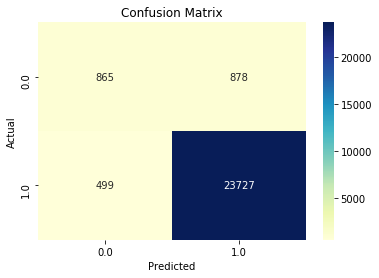

In [157]:
confusion_mat(predicted, train_labels)

In [158]:
predicted = clfr.predict(test_vectorized)

acc = metrics.accuracy_score(test_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')

#print (metrics.classification_report(test_labels,predicted))

ValueError: dimension mismatch

<b>We are not going to use the test data now to avoid overfitting


### Experimenting with  some pre-processing 

In [59]:
# Reducing the number of features & making stopwords removal
count_vec = CountVectorizer(min_df=3, stop_words='english')
print (len(vectorizer.get_feature_names()))
#train()

12223


<b>The below cell has the function that I will use to test all the models that I will build

In [60]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report
from sklearn.model_selection import StratifiedKFold
from colorama import Fore, Back, Style
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'




#kfold = model_selection.KFold(n_splits=10, random_state=42)
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)



def acc_calc(vectorizer,model):
    

    train_vectorized = vectorizer.fit_transform(train)
    test_vectorized = vectorizer.transform(test)

    
    def samples(train_set,train_set_labels):
        
        ### The train evaluation
        print(color.BOLD +Fore.WHITE+Back.BLUE + '\nAlgorithm Used \n' + color.END+str(model))
        print(color.BOLD +Back.YELLOW + '\nThe Train Model \n' + color.END)

        
        model.fit(train_set,train_set_labels)
        predicted_train = model.predict(train_set)
        print (metrics.classification_report(train_set_labels,predicted_train))
        
        plt.figure()
        confusion_mat(predicted_train, train_set_labels)

        print ("\n ")

    
        ### The Cross Validation evaluation
        
        scoring = {'accuracy' : make_scorer(accuracy_score), 
                   'precision' : make_scorer(precision_score),
                   'recall' : make_scorer(recall_score), 
                   'f1_score' : make_scorer(f1_score)}
    
    
        print(color.BOLD +Back.YELLOW + '\nThe Cross Validation Model\n' + color.END)
        results = cross_validate (estimator=clfr,
                                                  X=train_set,
                                                  y=train_set_labels,
                                                  cv=kfold,
                                                  scoring=scoring)

        print('Accuracy:', np.mean(results['test_accuracy']))
        print('Precision:', np.mean(results['test_precision']))
        print('Recall:', np.mean(results['test_recall']))
        print('F1:', np.mean(results['test_accuracy']))
        print ("\n ")


        ### The Test evaluation
        print(color.BOLD +Back.YELLOW + '\nThe Test Model\n' + color.END)
    
        model.fit(test_vectorized,test_labels)
        predicted = model.predict(test_vectorized)
        print (metrics.classification_report(test_labels,predicted))

        plt.figure()
        confusion_mat(predicted, test_labels)
        
        
        metrics.accuracy_score(test_labels,predicted)

        print ("\n ")

    
    def All_population():
        samples(train_vectorized,train_labels)

        
        
    def Oversampling():
        print(color.BOLD +Fore.WHITE+Back.BLUE + '\nOVERSAMPLING \n' + color.END)
        SM = SMOTE(random_state=5)
        Over_train,Over_train_labels= SM.fit_resample(train_vectorized,train_labels)

        samples(Over_train,Over_train_labels)
    
    
    def Undersampling():
        print(color.BOLD +Fore.WHITE+Back.BLUE + '\nUNDERSAMPLING \n' + color.END)
           
        undersample = RandomUnderSampler(sampling_strategy=0.5)
        Under_train,Under_train_labels = undersample.fit_resample(train_vectorized,train_labels)

        #undersample = RandomUnderSampler(sampling_strategy='majority')
        
        samples(Under_train,Under_train_labels)

        
    All_population()
    Oversampling()
    Undersampling()


Algorithm Used 
RandomForestClassifier(n_estimators=50)

The Train Model 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1743
         1.0       1.00      1.00      1.00     24226

    accuracy                           1.00     25969
   macro avg       1.00      1.00      1.00     25969
weighted avg       1.00      1.00      1.00     25969

Accuracy: 0.9996919403904656
Precision: 0.9996698852851366
Recall: 1.0
F1_score: 0.9998349153941394

 

The Cross Validation Model

Accuracy: 0.9263739629642593
Precision: 0.9591062465465656
Recall: 0.9621069314745524
F1: 0.9263739629642593

 

The Test Model

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       568
         1.0       1.00      1.00      1.00      8089

    accuracy                           1.00      8657
   macro avg       1.00      1.00      1.00      8657
weighted avg       1.00      1.00      1.00      8657

Accuracy:

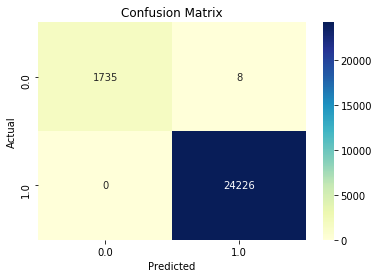

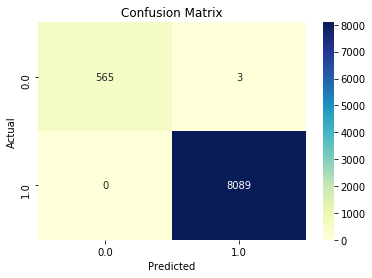

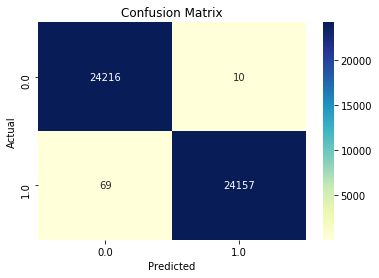

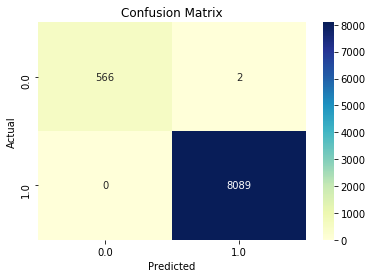

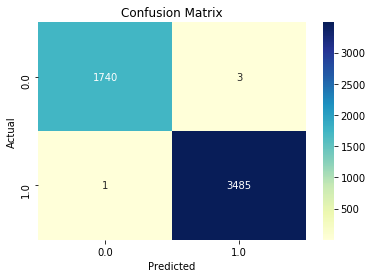

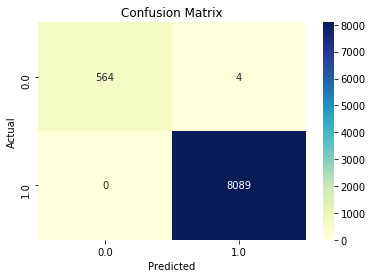

In [61]:
acc_calc(count_vec, RandomForestClassifier(n_estimators=50))



Algorithm Used 
RandomForestClassifier(n_estimators=50)

The Train Model 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1743
         1.0       1.00      1.00      1.00     24226

    accuracy                           1.00     25969
   macro avg       1.00      1.00      1.00     25969
weighted avg       1.00      1.00      1.00     25969

Accuracy: 0.9997304478416573
Precision: 0.9997523833106351
Recall: 0.9999587220341781
F1_score: 0.9998555420269517

 

The Cross Validation Model

Accuracy: 0.9263739629642593
Precision: 0.9591062465465656
Recall: 0.9621069314745524
F1: 0.9263739629642593

 

The Test Model

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       568
         1.0       1.00      1.00      1.00      8089

    accuracy                           1.00      8657
   macro avg       1.00      0.99      1.00      8657
weighted avg       1.00      1.00      1.00      

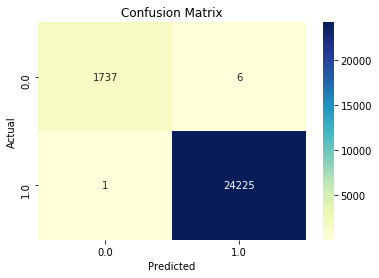

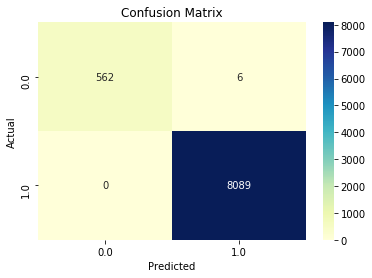

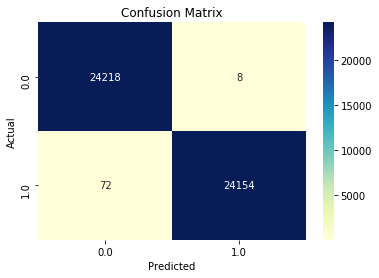

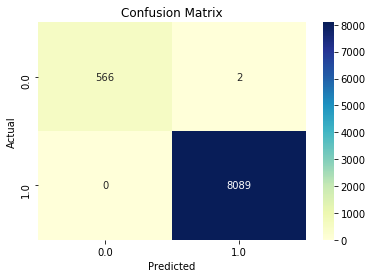

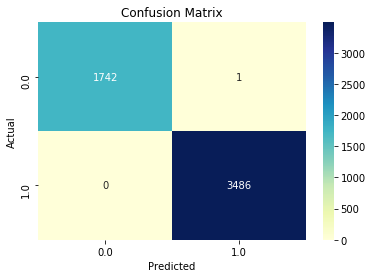

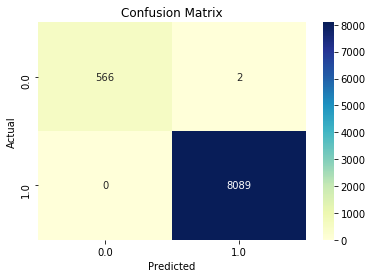

In [42]:
acc_calc(count_vec, RandomForestClassifier(n_estimators=50))



Algorithm Used 
MultinomialNB()

The Train Model 

              precision    recall  f1-score   support

         0.0       0.54      0.53      0.54      1743
         1.0       0.97      0.97      0.97     24226

    accuracy                           0.94     25969
   macro avg       0.75      0.75      0.75     25969
weighted avg       0.94      0.94      0.94     25969

Accuracy: 0.9380030035811929
Precision: 0.966386208034315
Recall: 0.9671840171716338
F1_score: 0.966784948011223

 

The Cross Validation Model

Accuracy: 0.9263739629642593
Precision: 0.9591062465465656
Recall: 0.9621069314745524
F1: 0.9263739629642593

 

The Test Model

              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56       568
         1.0       0.97      0.98      0.97      8089

    accuracy                           0.95      8657
   macro avg       0.79      0.75      0.77      8657
weighted avg       0.94      0.95      0.94      8657

Accuracy: 0.94686380

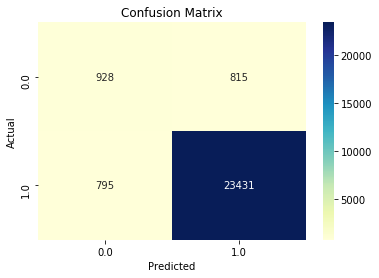

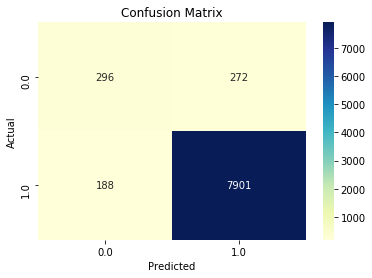

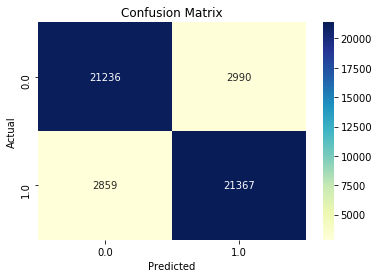

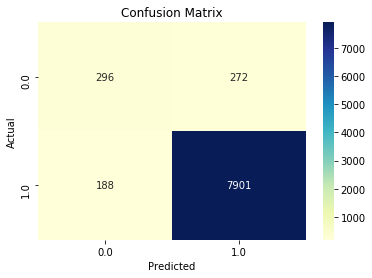

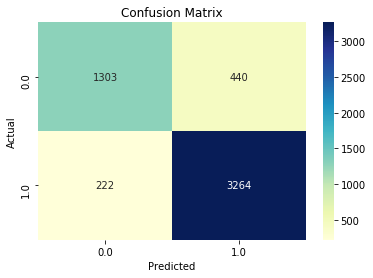

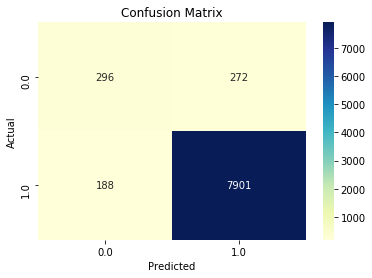

In [44]:
acc_calc(count_vec , naive_bayes.MultinomialNB())

In [46]:
# Let's try using a stemmer to see the difference
from nltk.stem.porter import PorterStemmer
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

In [47]:
#Apply Stemming 
Count_vec_n_gram = CountVectorizer( tokenizer=tokenize, min_df=2,ngram_range= (1,2))#.fit(train)



Algorithm Used 
MultinomialNB()

The Train Model 

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71      1743
         1.0       0.98      0.98      0.98     24226

    accuracy                           0.96     25969
   macro avg       0.83      0.86      0.84     25969
weighted avg       0.96      0.96      0.96     25969

Accuracy: 0.959798220955755
Precision: 0.9808745436442085
Recall: 0.9759349459258648
F1_score: 0.9783985102420857

 

The Cross Validation Model

Accuracy: 0.9343448170907169
Precision: 0.9637674622017636
Recall: 0.965945915365853
F1: 0.9343448170907169

 

The Test Model

              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75       568
         1.0       0.98      0.99      0.98      8089

    accuracy                           0.97      8657
   macro avg       0.89      0.85      0.87      8657
weighted avg       0.97      0.97      0.97      8657

Accuracy: 0.96915790

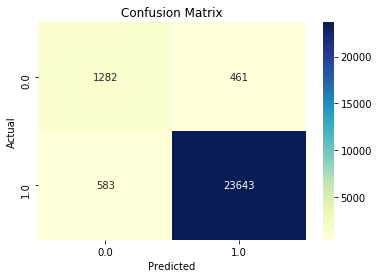

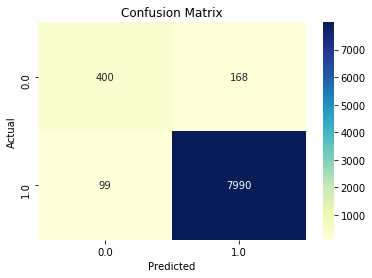

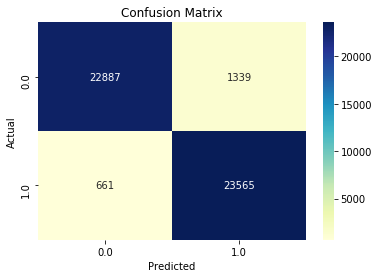

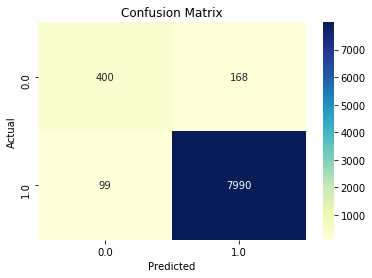

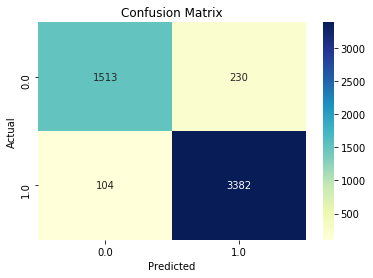

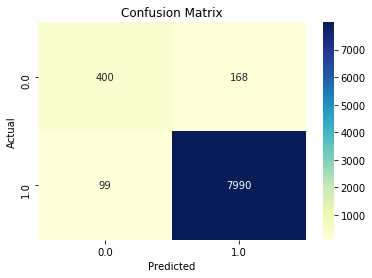

In [48]:
acc_calc(Count_vec_n_gram , naive_bayes.MultinomialNB())


Algorithm Used 
XGBClassifier(learning_rate=0.06, n_estimators=600, n_jobs=4)

The Train Model 

              precision    recall  f1-score   support

         0.0       0.93      0.31      0.46      1743
         1.0       0.95      1.00      0.97     24226

    accuracy                           0.95     25969
   macro avg       0.94      0.65      0.72     25969
weighted avg       0.95      0.95      0.94     25969

Accuracy: 0.952058223266202
Precision: 0.9525065963060686
Recall: 0.9983901593329481
F1_score: 0.9749088050948226

 

The Cross Validation Model

Accuracy: 0.9343448170907169
Precision: 0.9637674622017636
Recall: 0.965945915365853
F1: 0.9343448170907169

 

The Test Model

              precision    recall  f1-score   support

         0.0       0.98      0.39      0.55       568
         1.0       0.96      1.00      0.98      8089

    accuracy                           0.96      8657
   macro avg       0.97      0.69      0.77      8657
weighted avg       0.96      

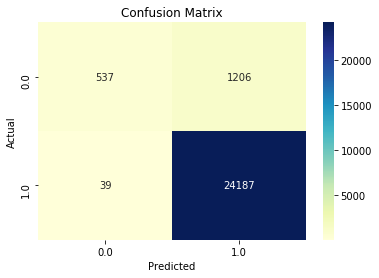

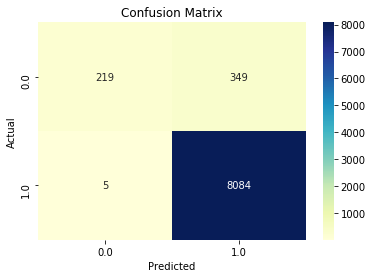

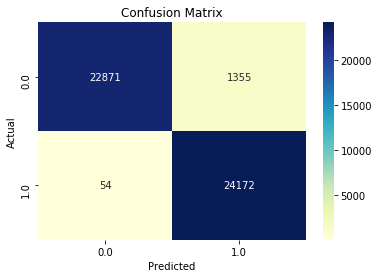

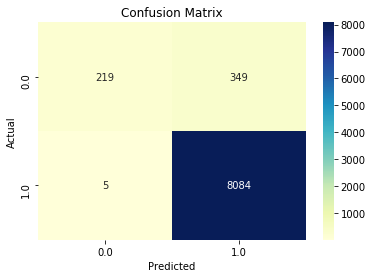

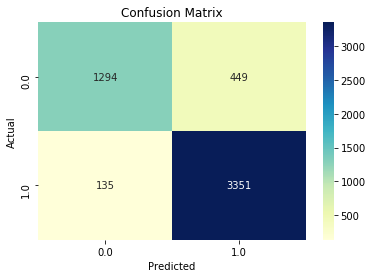

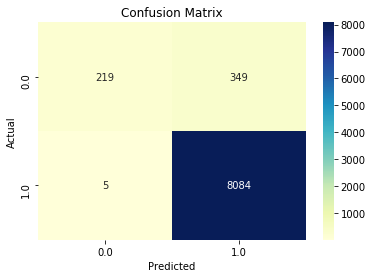

In [49]:
# Let's try with XGBOOST

acc_calc(Count_vec_n_gram , xgb.XGBClassifier(n_jobs=4,n_estimators=600, learning_rate=0.06))


In [50]:
count_vec2 = CountVectorizer(min_df=5, stop_words='english')



Algorithm Used 
XGBClassifier(learning_rate=0.06, n_estimators=600, n_jobs=4)

The Train Model 

              precision    recall  f1-score   support

         0.0       0.91      0.21      0.35      1743
         1.0       0.95      1.00      0.97     24226

    accuracy                           0.95     25969
   macro avg       0.93      0.61      0.66     25969
weighted avg       0.94      0.95      0.93     25969

Accuracy: 0.9458585236243213
Precision: 0.9464355583378982
Recall: 0.9984727152645918
F1_score: 0.9717579945363973

 

The Cross Validation Model

Accuracy: 0.9257963437722679
Precision: 0.9602214884059246
Recall: 0.9602493377360439
F1: 0.9257963437722679

 

The Test Model

              precision    recall  f1-score   support

         0.0       0.94      0.27      0.42       568
         1.0       0.95      1.00      0.97      8089

    accuracy                           0.95      8657
   macro avg       0.94      0.63      0.70      8657
weighted avg       0.95    

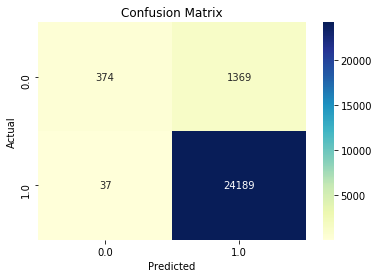

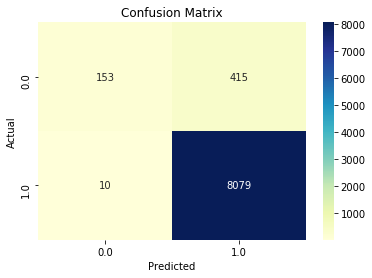

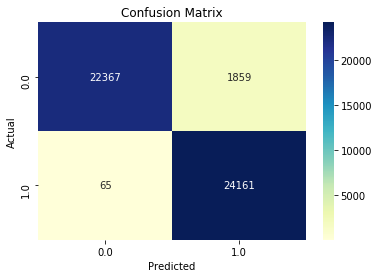

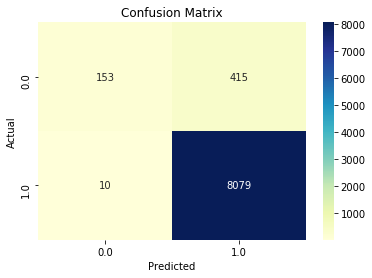

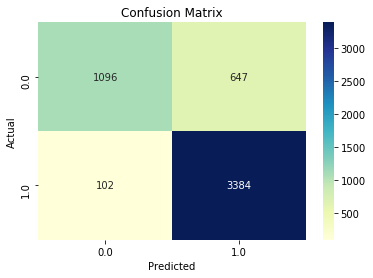

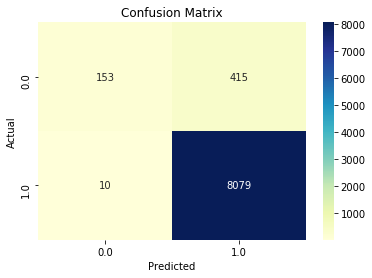

In [51]:
acc_calc(count_vec2, xgb.XGBClassifier(n_jobs=4,n_estimators=600, learning_rate=0.06))



Algorithm Used 
XGBClassifier(early_stopping_rounds=50, learning_rate=0.06, n_estimators=600,
              n_jobs=4)

The Train Model 

              precision    recall  f1-score   support

         0.0       0.91      0.21      0.35      1743
         1.0       0.95      1.00      0.97     24226

    accuracy                           0.95     25969
   macro avg       0.93      0.61      0.66     25969
weighted avg       0.94      0.95      0.93     25969

Accuracy: 0.9458585236243213
Precision: 0.9464355583378982
Recall: 0.9984727152645918
F1_score: 0.9717579945363973

 

The Cross Validation Model

Accuracy: 0.9257963437722679
Precision: 0.9602214884059246
Recall: 0.9602493377360439
F1: 0.9257963437722679

 

The Test Model

              precision    recall  f1-score   support

         0.0       0.94      0.27      0.42       568
         1.0       0.95      1.00      0.97      8089

    accuracy                           0.95      8657
   macro avg       0.94      0.63      0.

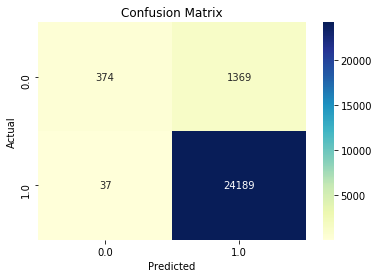

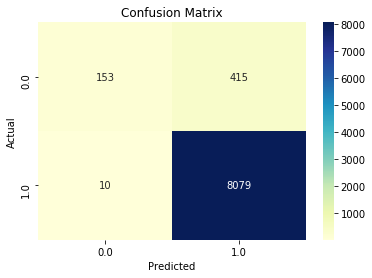

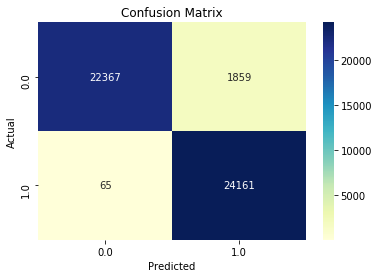

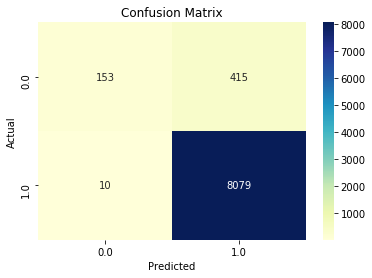

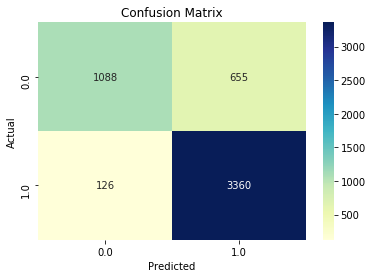

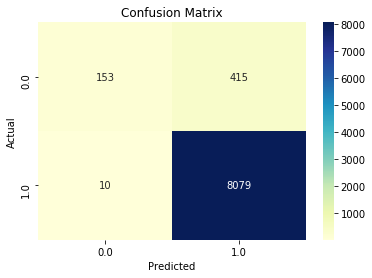

In [52]:
# Let's try early stopping adding to the Cross Validation to ensure no overfitting
acc_calc(count_vec2, xgb.XGBClassifier(n_jobs=4,n_estimators=600, learning_rate=0.06,early_stopping_rounds=50))



Algorithm Used 
RandomForestClassifier(n_estimators=50)

The Train Model 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1743
         1.0       1.00      1.00      1.00     24226

    accuracy                           1.00     25969
   macro avg       1.00      1.00      1.00     25969
weighted avg       1.00      1.00      1.00     25969

Accuracy: 0.9995764180368901
Precision: 0.9995461484507159
Recall: 1.0
F1_score: 0.9997730227183625

 

The Cross Validation Model

Accuracy: 0.9257963437722679
Precision: 0.9602214884059246
Recall: 0.9602493377360439
F1: 0.9257963437722679

 

The Test Model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       568
         1.0       1.00      1.00      1.00      8089

    accuracy                           1.00      8657
   macro avg       1.00      1.00      1.00      8657
weighted avg       1.00      1.00      1.00      8657

Accuracy:

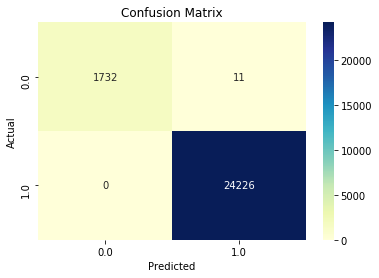

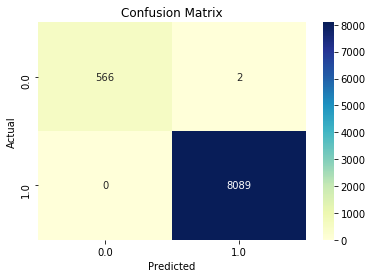

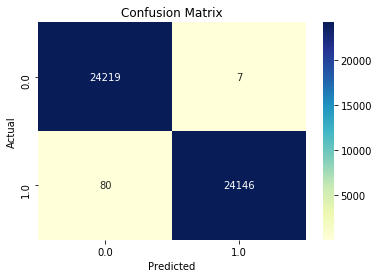

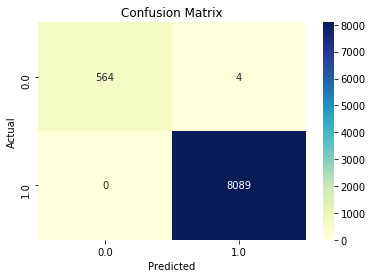

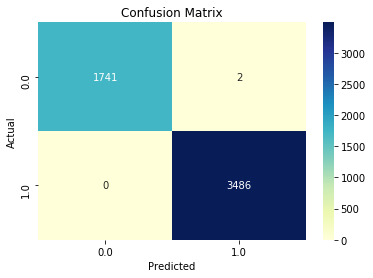

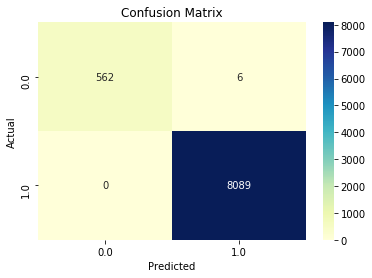

In [53]:
acc_calc(count_vec2, RandomForestClassifier(n_estimators=50))


In [54]:
# words = train, test, train_labels, test_labels

vectorizer = TfidfVectorizer()


Algorithm Used 
RandomForestClassifier(n_estimators=50)

The Train Model 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1743
         1.0       1.00      1.00      1.00     24226

    accuracy                           1.00     25969
   macro avg       1.00      1.00      1.00     25969
weighted avg       1.00      1.00      1.00     25969

Accuracy: 0.999614925488082
Precision: 0.9995873906585245
Recall: 1.0
F1_score: 0.9997936527588626

 

The Cross Validation Model

Accuracy: 0.9327659982212498
Precision: 0.9329071135740943
Recall: 0.9998348983540275
F1: 0.9327659982212498

 

The Test Model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       568
         1.0       1.00      1.00      1.00      8089

    accuracy                           1.00      8657
   macro avg       1.00      1.00      1.00      8657
weighted avg       1.00      1.00      1.00      8657

Accuracy: 

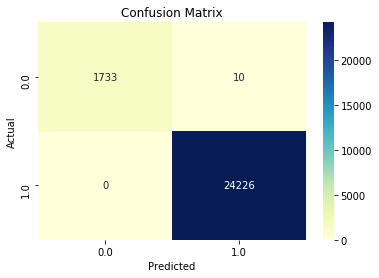

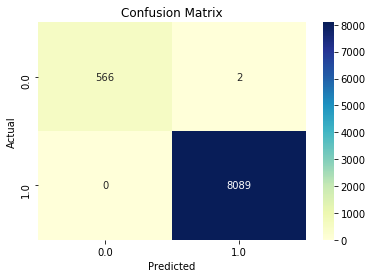

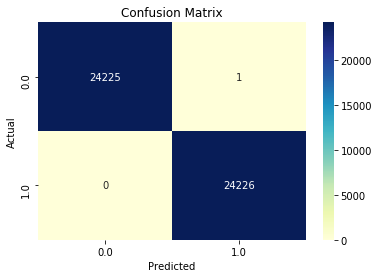

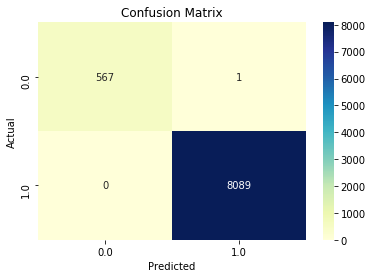

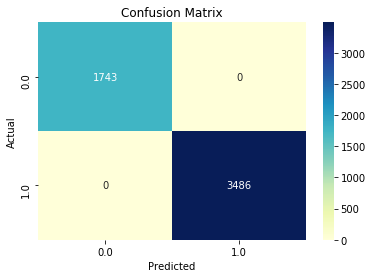

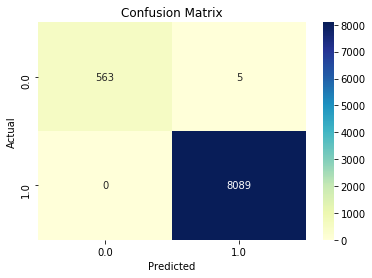

In [55]:
acc_calc(vectorizer, RandomForestClassifier(n_estimators=50))

In [56]:
vectorizer = TfidfVectorizer( min_df=4,  stop_words='english',lowercase=True )#.fit(train)



Algorithm Used 
RandomForestClassifier(n_estimators=50)

The Train Model 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1743
         1.0       1.00      1.00      1.00     24226

    accuracy                           1.00     25969
   macro avg       1.00      1.00      1.00     25969
weighted avg       1.00      1.00      1.00     25969

Accuracy: 0.999614925488082
Precision: 0.9995873906585245
Recall: 1.0
F1_score: 0.9997936527588626

 

The Cross Validation Model

Accuracy: 0.9344602904975694
Precision: 0.9352307371846619
Recall: 0.9989267115003375
F1: 0.9344602904975694

 

The Test Model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       568
         1.0       1.00      1.00      1.00      8089

    accuracy                           1.00      8657
   macro avg       1.00      1.00      1.00      8657
weighted avg       1.00      1.00      1.00      8657

Accuracy: 

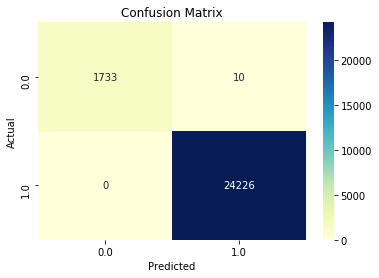

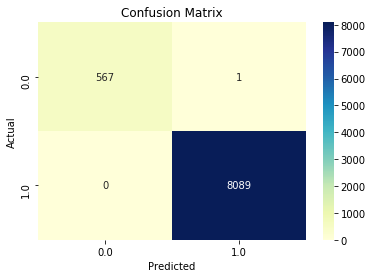

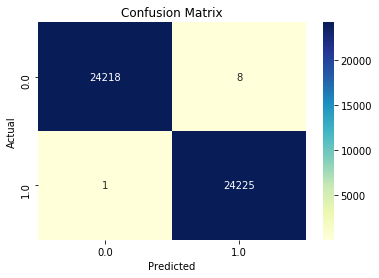

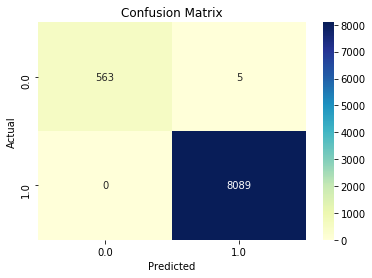

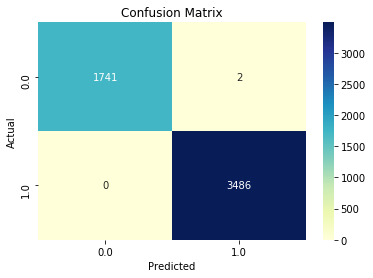

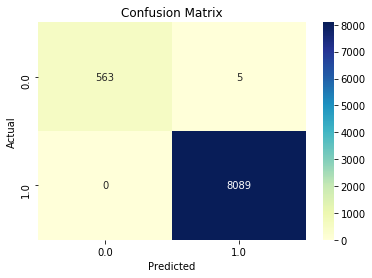

In [57]:
acc_calc(vectorizer, RandomForestClassifier(n_estimators=50))

Let's try using word2vec

In [58]:
from gensim.models import KeyedVectors

In [59]:
location = 'E:/Amazon/GoogleNews-vectors-negative300.bin/'

word2vec_model = KeyedVectors.load_word2vec_format(location + 'GoogleNews-vectors-negative300.bin', binary=True)

In [63]:
df[:2]

,reviews.rating,reviews.text
0,1.0,This product so far has not disappointed. My c...
1,1.0,great for beginner or experienced person. Boug...


In [64]:
### Convert tweets to arrays
reviews_raw_arr = np.array(df)
reviews = reviews_raw_arr

In [65]:
reviews[0]

array([1.0,
       'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'],
      dtype=object)

In [66]:
#### convert the model into vectors to search for the words in the Model

word_vectors = word2vec_model.wv

All_reviews_vector = []
reviewNo = 0
c = 0

for review in reviews: 
    counter = 0
    review_vector = []
    review_vector_shape = []
    words = review[1].split()
    
    for word in words:
        if word in word_vectors.vocab:
            review_vector.append(word2vec_model[word])
            counter +=1
    review_vector = np.array(review_vector)
    review_vector.reshape(-1,1)
    review_vector_shape = review_vector
    
    
    if counter != 0:
        All_reviews_vector.append (sum (review_vector_shape)/counter)
    
    else:        
        review_vector_shape
        All_reviews_vector.append (np.zeros(300))


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
All_reviews_vector = np.array(All_reviews_vector)
All_reviews_vector.shape

(34626, 300)

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()
scaler.fit(All_reviews_vector)
my_reviews = scaler.transform(All_reviews_vector)


In [70]:

train, test, train_labels, test_labels = train_test_split (my_reviews,                   
                                                 df['reviews.rating'],
                                                 test_size=0.25,                                                                   
                                                 random_state=0)

In [71]:
#reviews_train,reviews_test,train_labels,test_labels = train_test_split(my_reviews,                   
#                                                 df['reviews.rating'], test_size=0.30,
#                                                random_state=0)

In [72]:
#eval_set = [(reviews_test, test_labels)]
fit_params={'early_stopping_rounds': 10, 
            'eval_metric': 'logloss',
            'verbose': False,
            'eval_set': [[test, test_labels]]}

clfr = naive_bayes.MultinomialNB()
clfr.fit(train,train_labels)

predicted = clfr.predict(test)
acc = metrics.accuracy_score(test_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(test_labels,predicted))

accuracy = 93.43883562435023%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       568
         1.0       0.93      1.00      0.97      8089

    accuracy                           0.93      8657
   macro avg       0.47      0.50      0.48      8657
weighted avg       0.87      0.93      0.90      8657



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
#eval_set = [(reviews_test, test_labels)]
fit_params={'early_stopping_rounds': 10, 
            'eval_metric': 'logloss',
            'verbose': False,
            'eval_set': [[test, test_labels]]}

clfr = RandomForestClassifier(n_estimators=50)
clfr.fit(train,train_labels)

predicted = clfr.predict(test)
acc = metrics.accuracy_score(test_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(test_labels,predicted))

accuracy = 93.43883562435023%
              precision    recall  f1-score   support

         0.0       0.50      0.00      0.00       568
         1.0       0.93      1.00      0.97      8089

    accuracy                           0.93      8657
   macro avg       0.72      0.50      0.48      8657
weighted avg       0.91      0.93      0.90      8657



<b><h1>Conclusion</b>

- Our best model for this use case was RandomForestClassifier with 50n estimators
- Both vectorizers didn't have a significant impact on the result
- Word2vec didn't have high impact in this usecase